                      ID        date     Item Id  \
0  2022-04-12_B09KDTS4DC  2022-04-12  B09KDTS4DC   
1  2022-04-12_B09MR2MLZH  2022-04-12  B09MR2MLZH   
2  2022-04-12_B09KSYL73R  2022-04-12  B09KSYL73R   
3  2022-04-12_B09KT5HMNY  2022-04-12  B09KT5HMNY   
4  2022-04-12_B09KTF8ZDQ  2022-04-12  B09KTF8ZDQ   

                                           Item Name  ad_spend anarix_id  \
0  NapQueen Elizabeth 8" Gel Memory Foam Mattress...       NaN  NAPQUEEN   
1  NapQueen 12 Inch Bamboo Charcoal Queen Size Me...       NaN  NAPQUEEN   
2     NapQueen Elsa 8" Innerspring Mattress, Twin XL       NaN  NAPQUEEN   
3        NapQueen Elsa 6" Innerspring Mattress, Twin       NaN  NAPQUEEN   
4     NapQueen Elsa 6" Innerspring Mattress, Twin XL       NaN  NAPQUEEN   

   units  unit_price  
0    0.0         0.0  
1    0.0         0.0  
2    0.0         0.0  
3    0.0         0.0  
4    0.0         0.0  
ID                0
date              0
Item Id           2
Item Name      1832
ad_spend    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.01, max_depth=3, n_estimators=100, total=   1.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=3, n_estimators=100, total=   0.9s
[CV] learning_rate=0.01, max_depth=3, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100, total=   0.9s
[CV] learning_rate=0.01, max_depth=3, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=200, total=   1.8s
[CV] learning_rate=0.01, max_depth=3, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=200, total=   1.7s
[CV] learning_rate=0.01, max_depth=3, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=200, total=   1.7s
[CV] learning_rate=0.01, max_depth=3, n_estimators=300 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=300, total=   2.6s
[CV] learning_rate=0.01, max_depth=3, n_estimators=300 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=300, total=   2.5s
[CV] learning_rate=0.01, max_depth=3, n_estimators=300 ...............
[CV]  

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:  3.8min finished


Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Tuned XGBoost MSE: 1004.9787542245218


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


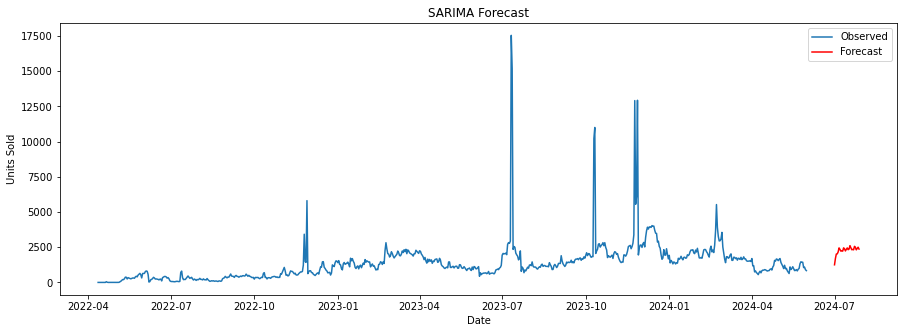

Submission file saved to: submission.csv
        date     Item Id     TARGET
0 2024-07-01  B09KDR64LT   3.359508
1 2024-07-01  B09KDTS4DC   3.359508
2 2024-07-01  B09KDTHJ6V   3.359508
3 2024-07-01  B09KDQ2BWY   3.359508
4 2024-07-01  B09KDYY3SB  18.007103


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the dataset
train = pd.read_csv('C:\\Users\\Admin\\Downloads\\train.csv')
test = pd.read_csv('C:\\Users\\Admin\\Downloads\\test.csv')

# Display the first few rows of the train dataset
print(train.head())

# Check for missing values
print(train.isnull().sum())

# Descriptive statistics
print(train.describe())

# Handle NaN values
train.fillna(train.mean(), inplace=True)

# Check for infinite values and replace them with NaN, then fill NaN
train.replace([np.inf, -np.inf], np.nan, inplace=True)
train.fillna(train.mean(), inplace=True)

# Ensure no NaN or infinite values are present
print(train.isnull().sum())

# Ensure no values are too large for dtype('float64')
numeric_cols = train.select_dtypes(include=[np.number]).columns
print((train[numeric_cols] > np.finfo(np.float64).max).sum())

# Prepare the features and target variable
train['date'] = pd.to_datetime(train['date'])
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day
train['day_of_week'] = train['date'].dt.dayofweek
train['ad_spend_per_unit_price'] = train['ad_spend'] / (train['unit_price'] + 1e-5)  # Adding a small value to avoid division by zero

features = ['ad_spend', 'unit_price', 'year', 'month', 'day', 'day_of_week', 'ad_spend_per_unit_price']
X = train[features]
y = train['units']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)
mse_lr = mean_squared_error(y_val, y_pred_lr)
print(f'Linear Regression MSE: {mse_lr}')

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
mse_rf = mean_squared_error(y_val, y_pred_rf)
print(f'Random Forest MSE: {mse_rf}')

# XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)
mse_xgb = mean_squared_error(y_val, y_pred_xgb)
print(f'XGBoost MSE: {mse_xgb}')

# Hyperparameter tuning for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Re-train the model with best parameters
best_xgb = xgb.XGBRegressor(objective='reg:squarederror', **best_params)
best_xgb.fit(X_train, y_train)
y_pred_best_xgb = best_xgb.predict(X_val)
mse_best_xgb = mean_squared_error(y_val, y_pred_best_xgb)
print(f'Tuned XGBoost MSE: {mse_best_xgb}')

# Aggregating the sales data by date
time_series_data = train.groupby('date')['units'].sum()

# Fit SARIMA model
sarima_model = SARIMAX(time_series_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)

# Forecast for the test period
test_dates = pd.to_datetime(test['date']).drop_duplicates().sort_values()
sarima_forecast = sarima_fit.get_forecast(steps=len(test_dates)).predicted_mean

# Plot the forecast
plt.figure(figsize=(15, 5))
plt.plot(time_series_data, label='Observed')
plt.plot(test_dates, sarima_forecast, label='Forecast', color='red')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

# Predict using the best XGBoost model
test['date'] = pd.to_datetime(test['date'])
test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day
test['day_of_week'] = test['date'].dt.dayofweek
test['ad_spend_per_unit_price'] = test['ad_spend'] / (test['unit_price'] + 1e-5)  # Adding a small value to avoid division by zero

test_features = test[features]
test['TARGET'] = best_xgb.predict(test_features)

# Prepare the submission file
submission = test[['date', 'Item Id', 'TARGET']]
submission_file_path = 'submission.csv'
submission.to_csv(submission_file_path, index=False)

print(f'Submission file saved to: {submission_file_path}')
print(submission.head())
